In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import files
arquivo = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [8]:
data = pd.read_csv('breast-cancer.csv',',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
data.drop('id',axis='columns', inplace=True)
data['diagnosis']=data['diagnosis'].replace({'M': 1,'B': 0}) # Maligno 1 e Benigno 0
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#1. Escolha apenas atributos contínuos e escolha um deles como sendo o classificador

X = data.iloc[:, 1:-1].values 
y = data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


TypeError: ignored

### Decision Tree Regression

In [13]:
regression_tree = tree.DecisionTreeRegressor(criterion='mse',max_depth = 3, min_samples_split=30, min_samples_leaf=10,random_state=1)
regression_tree.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=3, min_samples_leaf=10,
                      min_samples_split=30, random_state=1)

In [14]:
#Avaliação do Modelo
crossvalidation = KFold(n_splits=5,shuffle=True, random_state=1)
score = np.mean(cross_val_score(regression_tree,X,y,scoring='neg_mean_absolute_error',cv=crossvalidation, n_jobs=1))
print('Mean absolute error: %.3f' % abs(score))

Mean absolute error: 0.096


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

### Random Forest Regressor
###2. Execute um dos algoritmos para Regressão do sklearn (Regressão Linear, RandomForestRegressor, KneighborsRegressor, SVR) utilizando a função GridSearchCV.

In [15]:
#Treinamento
from sklearn.ensemble import RandomForestRegressor
k_range = [100,200,300,400,500,600,700,800,900,1000]
#Create a list of predictions for each number of trees in the forest
rfr_list_predict = []
crossvalidation = KFold(n_splits=5,shuffle=True, random_state=1)
for k in k_range:
    rfr = RandomForestRegressor(n_estimators= k,n_jobs = -1,random_state = 1 )
    rfr.fit(X,y)
    score = np.mean(cross_val_score(rfr,X,y,scoring='neg_mean_absolute_error',cv=crossvalidation, n_jobs=1))
    rfr_list_predict.append(abs(score))
    print('Mean absolute error: %.3f' % abs(score))

Mean absolute error: 0.080
Mean absolute error: 0.080
Mean absolute error: 0.080
Mean absolute error: 0.080
Mean absolute error: 0.079
Mean absolute error: 0.079
Mean absolute error: 0.079
Mean absolute error: 0.079
Mean absolute error: 0.079
Mean absolute error: 0.079


2.1 Altere os parâmetros do algoritmo, tais como quantidade de arvores geradas na floresta (n_estimator), número máximo de features por árvore (max_features), entre outros.

2.2 Encontre os melhores parâmetros (hiperparâmetros) e melhor pontuação.

In [16]:
#GridSearch is used to tune the hyper-parameters for the classifier
#Take time - around 50 minutes
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [80,95,110],
    'max_features': [ 3, 5],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 9,10],
    'n_estimators': [100,200,300,500,800,1000] #number of forests
}
rfc = RandomForestClassifier()
# cv = n-cross-validation
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit = 'TRUE')
grid_search.fit(X, y)

print('Melhores parametros = \n',grid_search.best_params_)
print('\nMelhor pontuação: \n',grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Melhores parametros = 
 {'criterion': 'entropy', 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 100}

Melhor pontuação: 
 0.9666109718741298


3. Execute novamente o algoritmo escolhido com o método holdout utilizando entre 25 a 30% dos dados para teste e os melhores parâmetros encontrados pelo GridSearchCV.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(398, 29) (398,)
(171, 29) (171,)


In [19]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [255 143]]


In [20]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [102  69]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
   
def model_rf(criterion,max_depth, n_estimators):
    model = RandomForestClassifier(criterion = criterion, max_depth = max_depth, n_estimators = n_estimators)
    return model

def model_to_predict(model,dfx,dfy,cv_layers):
    predictions = cross_val_predict(model, dfx, dfy, cv=cv_layers)
    return predictions

def accuracy(dfy, predictions):
    score = accuracy_score(dfy,predictions)*100
    return score

In [24]:
rf_model = model_rf('entropy', 110, 100)
pred_rf = model_to_predict(rf_model,X_train,y_train,10)
print('RF: {}'.format(accuracy(y_train,pred_rf)))

RF: 95.47738693467338


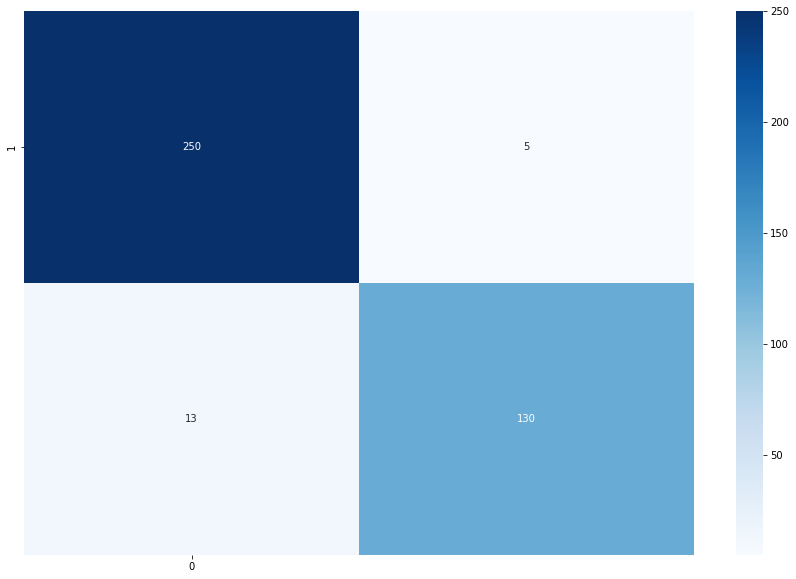

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

def model_confusion_matrix(dfy,predictions):
    cf = confusion_matrix(dfy, predictions)
    return cf

cf_rf = model_confusion_matrix(y_train,pred_rf)

def plot_confusion_matrix(cf):
    lbl1 = [0]
    lbl2 = [1]
    plt.figure(figsize=(15, 10))
    sns.heatmap(cf, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
    plt.show()

plot_confusion_matrix(cf_rf)

3.1 Analise e compare os resultados obtidos, utilizando o erro médio absoluto (MAE).

3.2 O objetivo é encontrar o melhor modelo para o dataset, baseando-se nas medidas de avaliação dos métodos supervisionados para regressão.

In [26]:
#Treinamento
from sklearn.ensemble import RandomForestRegressor
k_range = [100]
#Create a list of predictions for each number of trees in the forest
rfr_list_predict = []
crossvalidation = KFold(n_splits=5,shuffle=True, random_state=1)
for k in k_range:
    rfr = RandomForestRegressor(n_estimators= k,n_jobs = -1,random_state = 1 )
    rfr.fit(X_train,y_train)
    score = np.mean(cross_val_score(rfr,X_train,y_train,scoring='neg_mean_absolute_error',cv=crossvalidation, n_jobs=1))
    rfr_list_predict.append(abs(score))
    print('Mean absolute error: %.3f' % abs(score))

Mean absolute error: 0.087


In [27]:
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y_train, pred_rf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       255
           1       0.96      0.91      0.94       143

    accuracy                           0.95       398
   macro avg       0.96      0.94      0.95       398
weighted avg       0.96      0.95      0.95       398

